In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))


f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()


99.94916115912558% of samples were classified correctly !


In [11]:
from sklearn.metrics import classification_report

print('Classification Report:')
print(classification_report(y_test, y_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       160
           1       1.00      1.00      1.00        80
          10       1.00      1.00      1.00        80
          11       1.00      1.00      1.00        80
          12       1.00      1.00      1.00        80
          13       1.00      1.00      1.00        80
          14       1.00      1.00      1.00        76
          15       1.00      1.00      1.00        77
          16       1.00      1.00      1.00        64
          17       1.00      0.99      0.99        79
          18       1.00      1.00      1.00        80
          19       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        80
          20       1.00      1.00      1.00        80
          21       1.00      1.00      1.00        80
          22       1.00      1.00      1.00        40
          23       1.00      1.00      1.00        37
    

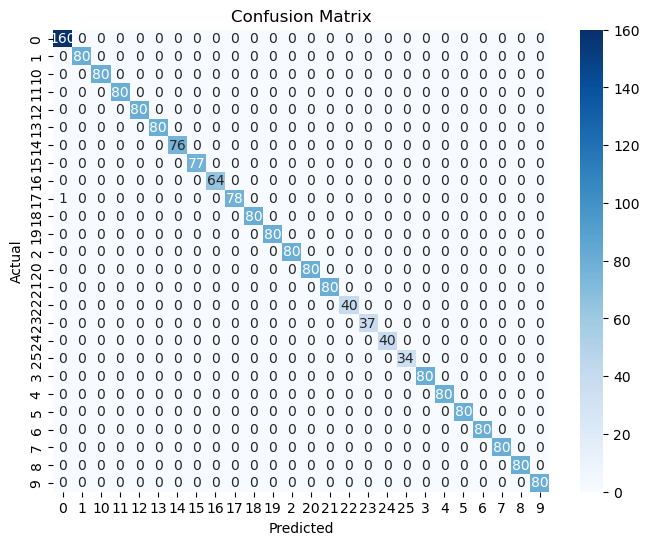

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



Training Accuracy: 100.00%
Testing Accuracy: 99.95%


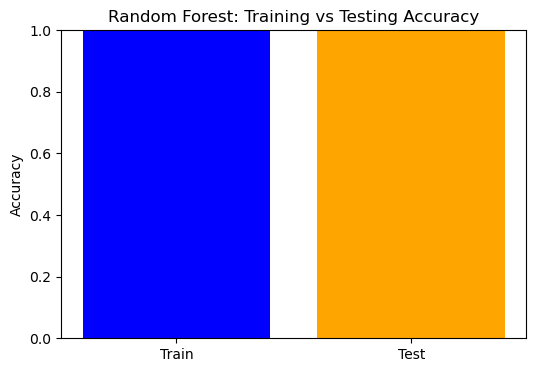

In [14]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print(f"Training Accuracy: {train_score * 100:.2f}%")
print(f"Testing Accuracy: {test_score * 100:.2f}%")
plt.figure(figsize=(6, 4))
plt.bar(["Train", "Test"], [train_score, test_score], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Random Forest: Training vs Testing Accuracy")
plt.show()


In [5]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, data, labels, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")


Cross-Validation Accuracy: 99.90% ± 0.07%


Random Forest Accuracy: 99.94916115912558%
Logistic Regression Accuracy: 99.90%
SVM Accuracy: 99.95%


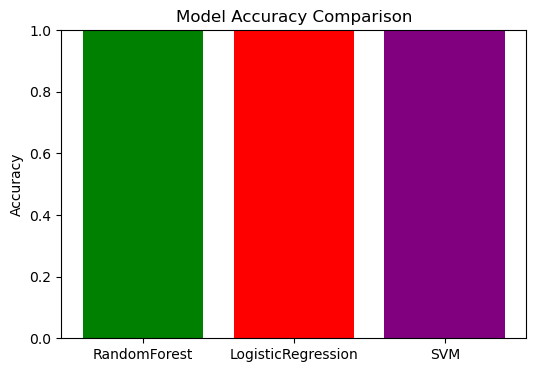

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

print('Random Forest Accuracy: {}%'.format(score * 100))
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_model.predict(x_test)) * 100:.2f}%")

svm_model = SVC()
svm_model.fit(x_train, y_train)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_model.predict(x_test)) * 100:.2f}%")

plt.figure(figsize=(6, 4))
plt.bar(["RandomForest", "LogisticRegression", "SVM"], [score, accuracy_score(y_test, log_model.predict(x_test)), accuracy_score(y_test, svm_model.predict(x_test))], color=['green', 'red', 'purple'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [20]:
# Initialize models
rf_model = RandomForestClassifier()
log_model = LogisticRegression(max_iter=500)
svm_model = SVC()

# Train models
rf_model.fit(x_train, y_train)
log_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

# Predictions
rf_pred = rf_model.predict(x_test)
log_pred = log_model.predict(x_test)
svm_pred = svm_model.predict(x_test)

# Accuracy Scores
rf_acc = accuracy_score(y_test, rf_pred)
log_acc = accuracy_score(y_test, log_pred)
svm_acc = accuracy_score(y_test, svm_pred)

# Train & Test Accuracy for Overfitting Check
rf_train_acc = rf_model.score(x_train, y_train)
rf_test_acc = rf_model.score(x_test, y_test)

# Cross-validation
rf_cv_scores = cross_val_score(rf_model, data, labels, cv=5)
log_cv_scores = cross_val_score(log_model, data, labels, cv=5)
svm_cv_scores = cross_val_score(svm_model, data, labels, cv=5)

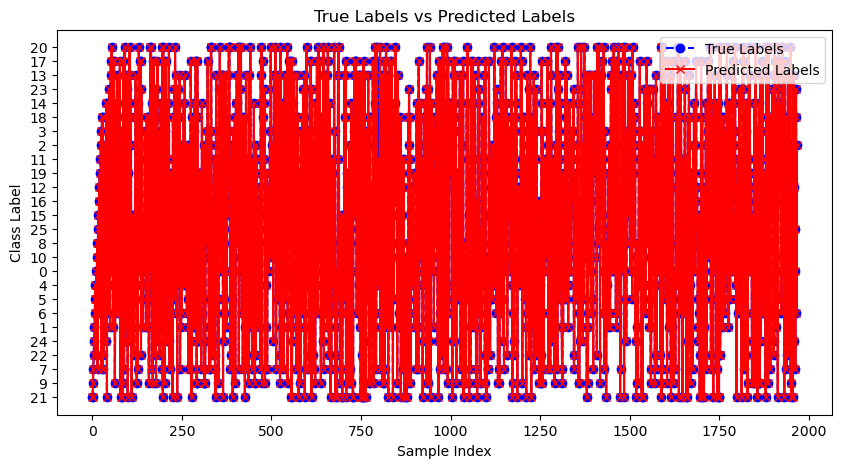

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="True Labels", marker='o', linestyle='dashed', color='blue')
plt.plot(range(len(y_predict)), y_predict, label="Predicted Labels", marker='x', linestyle='solid', color='red')

plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("True Labels vs Predicted Labels")
plt.legend()
plt.show()